In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from lazypredict.Supervised import LazyClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc

In [2]:
df = pd.read_csv("C:/Users/honey/OneDrive/Masaüstü/WTECH/project-3/bank.csv")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
df.shape

(11162, 17)

In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.00,11162.00,11162.00,11162.00,11162.00,11162.00,11162.00
mean,41.23,1528.54,15.66,371.99,2.51,51.33,0.83
std,11.91,3225.41,8.42,347.13,2.72,108.76,2.29
min,18.00,-6847.00,1.00,2.00,1.00,-1.00,0.00
25%,32.00,122.00,8.00,138.00,1.00,-1.00,0.00
50%,39.00,550.00,15.00,255.00,2.00,-1.00,0.00
75%,49.00,1708.00,22.00,496.00,3.00,20.75,1.00
max,95.00,81204.00,31.00,3881.00,63.00,854.00,58.00


In [7]:
df.duplicated().sum()

0

In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [9]:
df.columns.str.strip()

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [11]:
cat_cols = []
num_cols = []

for column in df.columns:
    if df[column].dtype == 'object':
        cat_cols.append(column)  
    else:
        num_cols.append(column)  

print("Categorical Columns:", cat_cols)
print("Numerical Columns:", num_cols)

Categorical Columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']
Numerical Columns: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [12]:
# now we can start to explore the data by visualizing columns

In [13]:
# first, let's start with visualizing numeric columns to get information about them

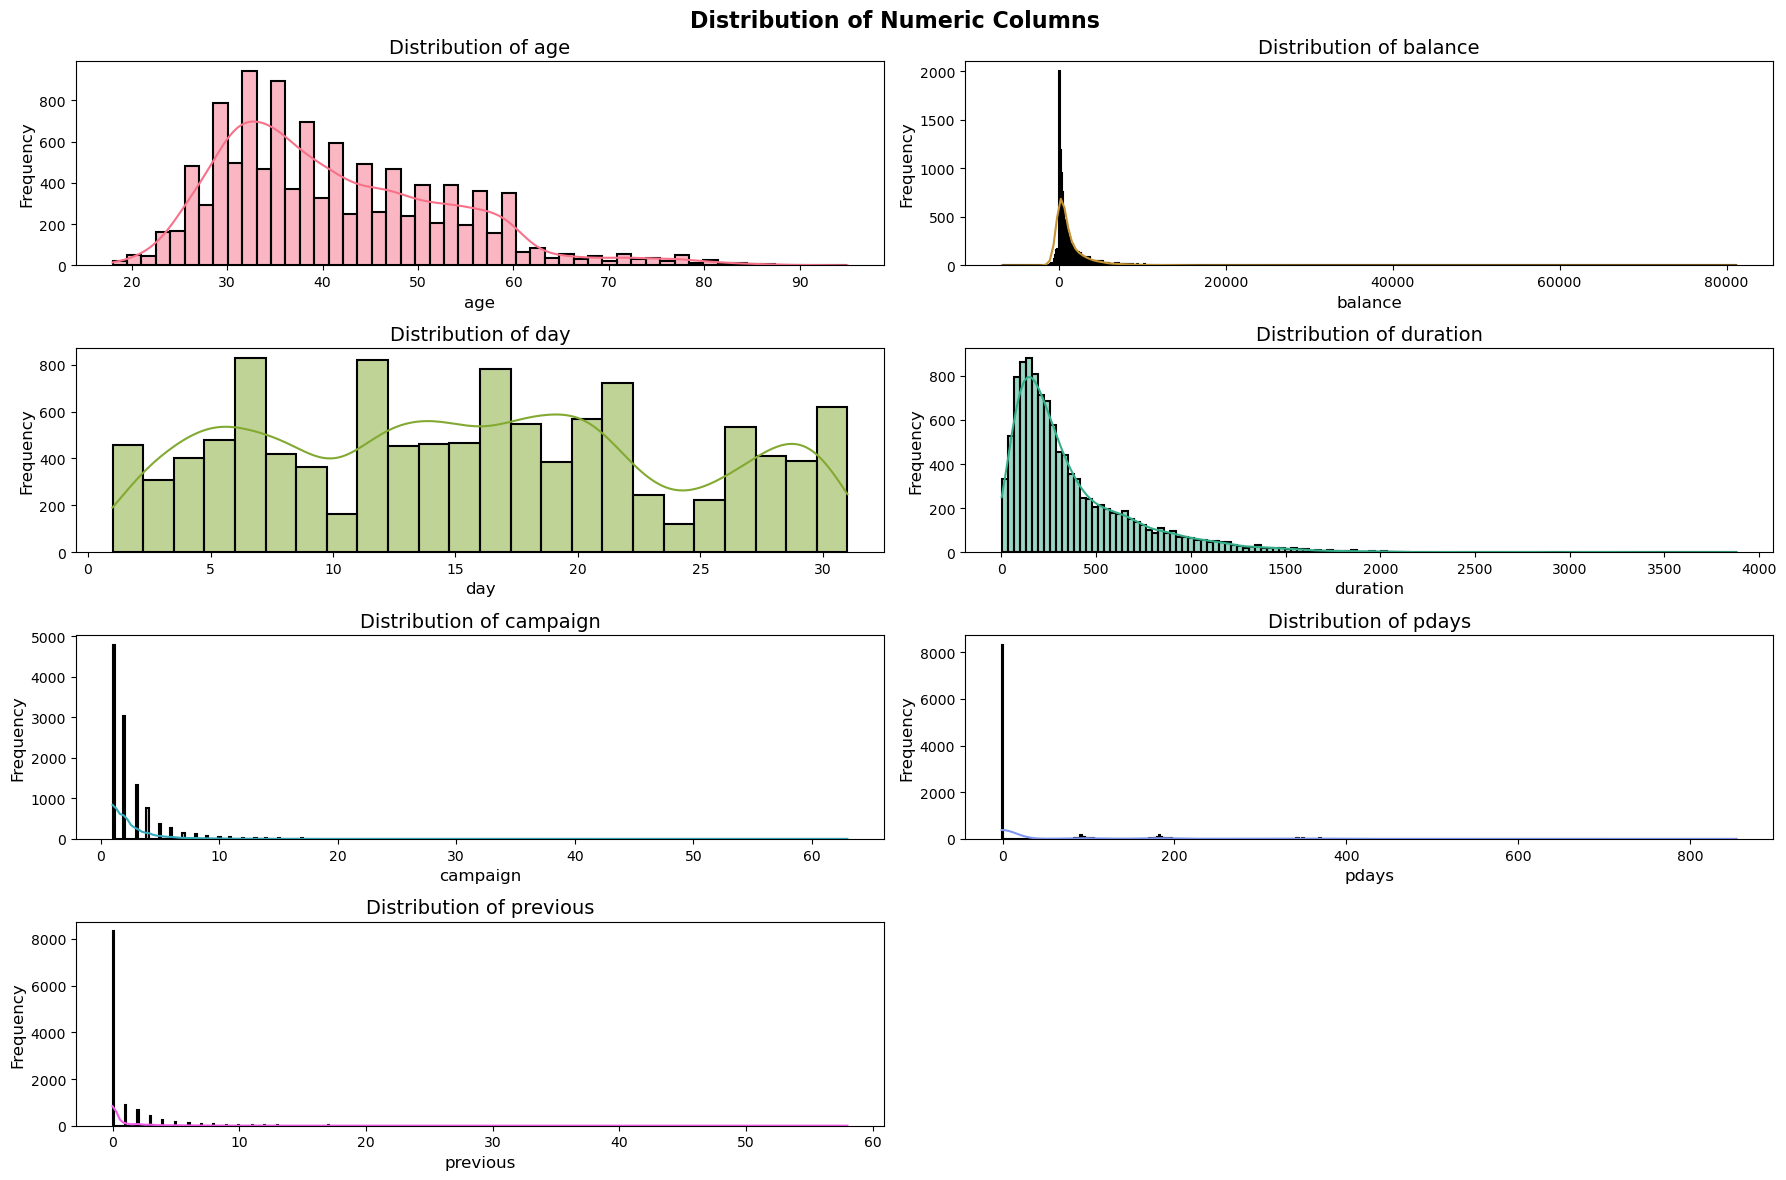

In [14]:
plt.figure(figsize=(18, 12))
plt.suptitle('Distribution of Numeric Columns', fontsize=16, fontweight='bold')
color_palette = sns.color_palette("husl", len(num_cols))

for i, column in enumerate(num_cols, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[column].dropna(), kde=True, color=color_palette[i-1], linewidth=1.5)  
    plt.title(f"Distribution of {column}", fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    
plt.tight_layout()
plt.show()

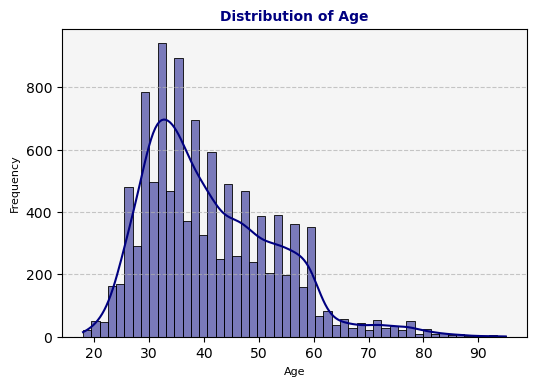

In [15]:
plt.figure(figsize=(6, 4))
sns.histplot(df['age'], kde=True, color='navy')
plt.title('Distribution of Age', fontsize=10, fontweight='bold',color='navy')
plt.xlabel('Age', fontsize=8)
plt.ylabel('Frequency', fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().set_facecolor('whitesmoke')
plt.show()

In [16]:
df['age'].describe()

count   11162.00
mean       41.23
std        11.91
min        18.00
25%        32.00
50%        39.00
75%        49.00
max        95.00
Name: age, dtype: float64

In [17]:
age_counts = df['age'].value_counts()
top_10_most_common_age = age_counts.head(10)
print(top_10_most_common_age)

31    496
32    477
34    466
33    464
35    461
30    456
36    432
37    370
38    353
39    343
Name: age, dtype: int64


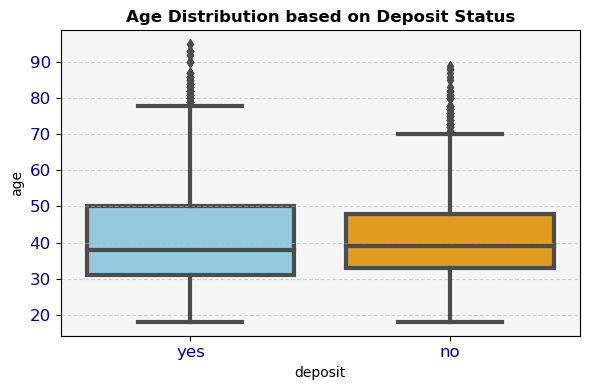

In [18]:
colors = ["skyblue", "orange"]
plt.figure(figsize=(6, 4))
sns.boxplot(x='deposit', y='age', data=df, palette=colors, linewidth=3)

plt.title('Age Distribution based on Deposit Status', fontsize=12, fontweight='bold', color='black')
plt.xticks(fontsize=12, color='darkblue')
plt.yticks(fontsize=12, color='darkblue')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.gca().set_facecolor('whitesmoke')

plt.tight_layout()
plt.show()

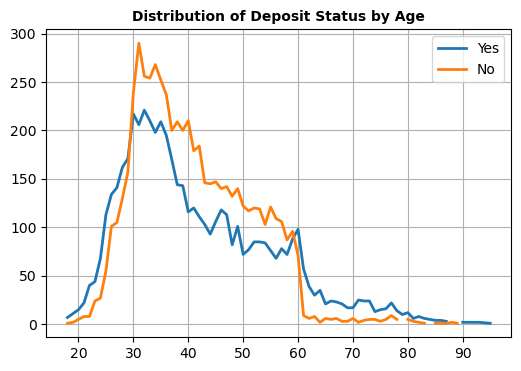

In [19]:
age_counts = df.groupby(['age', 'deposit']).size().unstack()
plt.figure(figsize=(6, 4))
plt.plot(age_counts.index, age_counts['yes'], linewidth=2, label='Yes')
plt.plot(age_counts.index, age_counts['no'], linewidth=2, label='No')
plt.title('Distribution of Deposit Status by Age', fontsize=10, fontweight='bold', color='black')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
df['balance'].describe()

count   11162.00
mean     1528.54
std      3225.41
min     -6847.00
25%       122.00
50%       550.00
75%      1708.00
max     81204.00
Name: balance, dtype: float64

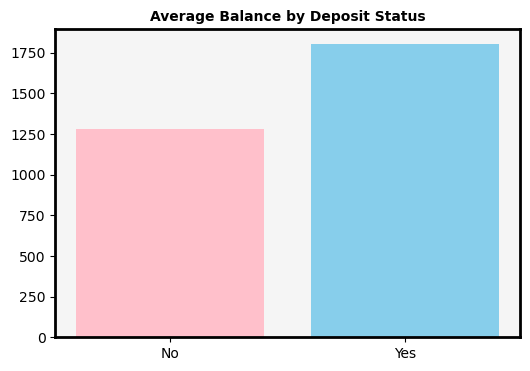

In [21]:
balance_avg = df.groupby('deposit')['balance'].mean()
colors = ["pink", "skyblue"]

plt.figure(figsize=(6, 4))
bars = plt.bar(balance_avg.index, balance_avg.values, color=colors)
plt.setp(bars, linewidth=20)
plt.title('Average Balance by Deposit Status', fontsize=10, fontweight='bold')
plt.xticks(balance_avg.index, ['No', 'Yes'], fontsize=10)
plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['right'].set_linewidth(2)
plt.gca().set_facecolor('whitesmoke')
plt.show()

In [22]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [23]:
num_cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

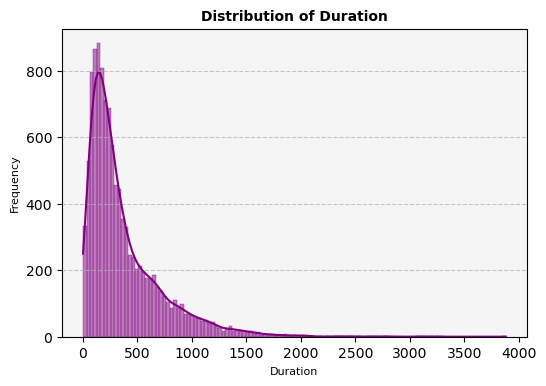

In [24]:
plt.figure(figsize=(6, 4))
sns.histplot(df['duration'], kde=True, color='purple', edgecolor='purple') 
plt.title('Distribution of Duration', fontsize=10, fontweight='bold')
plt.xlabel('Duration', fontsize=8)
plt.ylabel('Frequency', fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().set_facecolor('whitesmoke')
plt.show()

In [25]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [26]:
df[['pdays', 'campaign', 'previous']].describe()

,pdays,campaign,previous
count,11162.00,11162.00,11162.00
mean,51.33,2.51,0.83
std,108.76,2.72,2.29
min,-1.00,1.00,0.00
25%,-1.00,1.00,0.00
50%,-1.00,2.00,0.00
75%,20.75,3.00,1.00
max,854.00,63.00,58.00


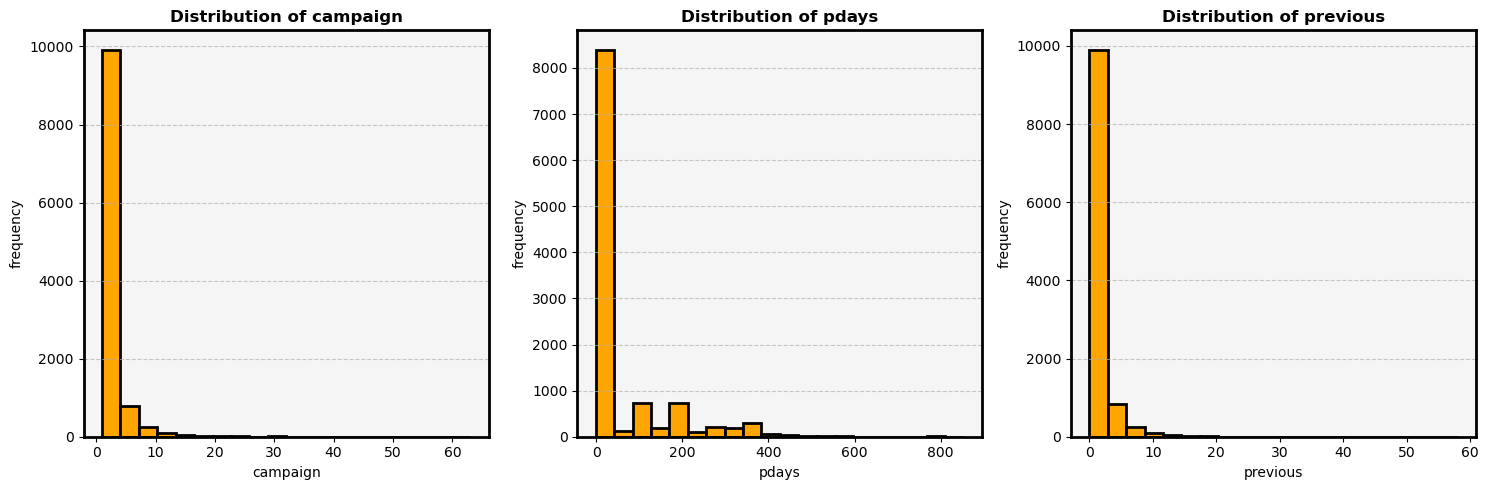

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for ax, column in zip(axes, ['campaign', 'pdays', 'previous']):
    ax.hist(df[column], bins=20, color='orange', edgecolor='black', linewidth=2)  
    ax.set_title(f'Distribution of {column}', fontsize=12, fontweight='bold')
    ax.set_xlabel(column, fontsize=10)  
    ax.set_ylabel('frequency', fontsize=10) 
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_facecolor('whitesmoke')  
    for spine in ax.spines.values():  
        spine.set_linewidth(2)
    

plt.tight_layout()
plt.show()

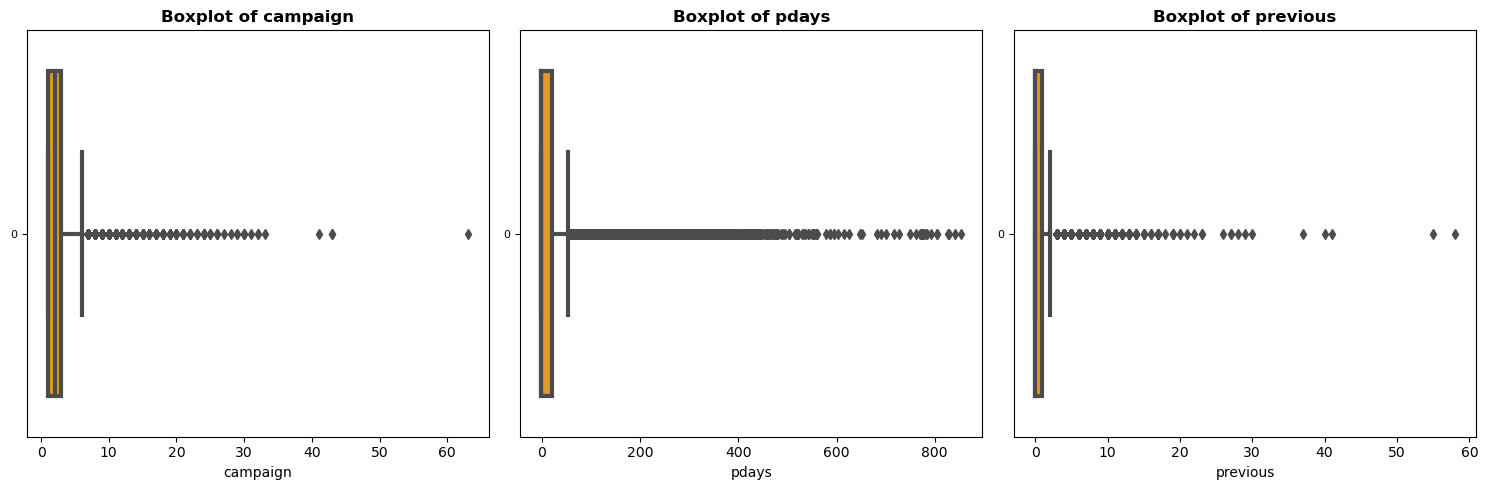

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for ax, column in zip(axes, ['campaign', 'pdays', 'previous']):
    sns.boxplot(x=df[column], ax=ax, color='orange', linewidth=3)  
    ax.set_title(f'Boxplot of {column}', fontsize=12, fontweight='bold') 
    ax.set_xlabel(column, fontsize=10) 
    ax.set_yticklabels([f'{int(tick)}' for tick in ax.get_yticks()], fontsize=8)



plt.tight_layout()
plt.show()

In [29]:
def detect_outliers_columns(dataframe, threshold=1.5):
    outlier_columns = []
    for col_name in dataframe.columns:
        if dataframe[col_name].dtype in ['int64', 'float64']:
            q1 = dataframe[col_name].quantile(0.05)
            q3 = dataframe[col_name].quantile(0.95)
            iqr = q3 - q1
            lower_bound = q1 - threshold * iqr
            upper_bound = q3 + threshold * iqr
            col_outliers = dataframe[(dataframe[col_name] < lower_bound) | (dataframe[col_name] > upper_bound)]
            if not col_outliers.empty:
                outlier_columns.append(col_name)
    return outlier_columns

outlier_columns = detect_outliers_columns(df)

print("outlier columns:")
print(outlier_columns)

outlier columns:
['balance', 'duration', 'campaign', 'pdays', 'previous']


In [30]:
def remove_outliers(dataframe, threshold=1.5):
    for col_name in dataframe.columns:
        if dataframe[col_name].dtype in ['int64', 'float64']:
            q1 = dataframe[col_name].quantile(0.05)
            q3 = dataframe[col_name].quantile(0.95)
            iqr = q3 - q1
            lower_bound = q1 - threshold * iqr
            upper_bound = q3 + threshold * iqr
            dataframe = dataframe[(dataframe[col_name] >= lower_bound) & (dataframe[col_name] <= upper_bound)]
    return dataframe

df = remove_outliers(df)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10929 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        10929 non-null  int64 
 1   job        10929 non-null  object
 2   marital    10929 non-null  object
 3   education  10929 non-null  object
 4   default    10929 non-null  object
 5   balance    10929 non-null  int64 
 6   housing    10929 non-null  object
 7   loan       10929 non-null  object
 8   contact    10929 non-null  object
 9   day        10929 non-null  int64 
 10  month      10929 non-null  object
 11  duration   10929 non-null  int64 
 12  campaign   10929 non-null  int64 
 13  pdays      10929 non-null  int64 
 14  previous   10929 non-null  int64 
 15  poutcome   10929 non-null  object
 16  deposit    10929 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.5+ MB
None


In [31]:
# we've removed outliers to get better result for our model

In [32]:
# so we can visualize categorical columns for more information about the data

In [33]:
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'deposit']

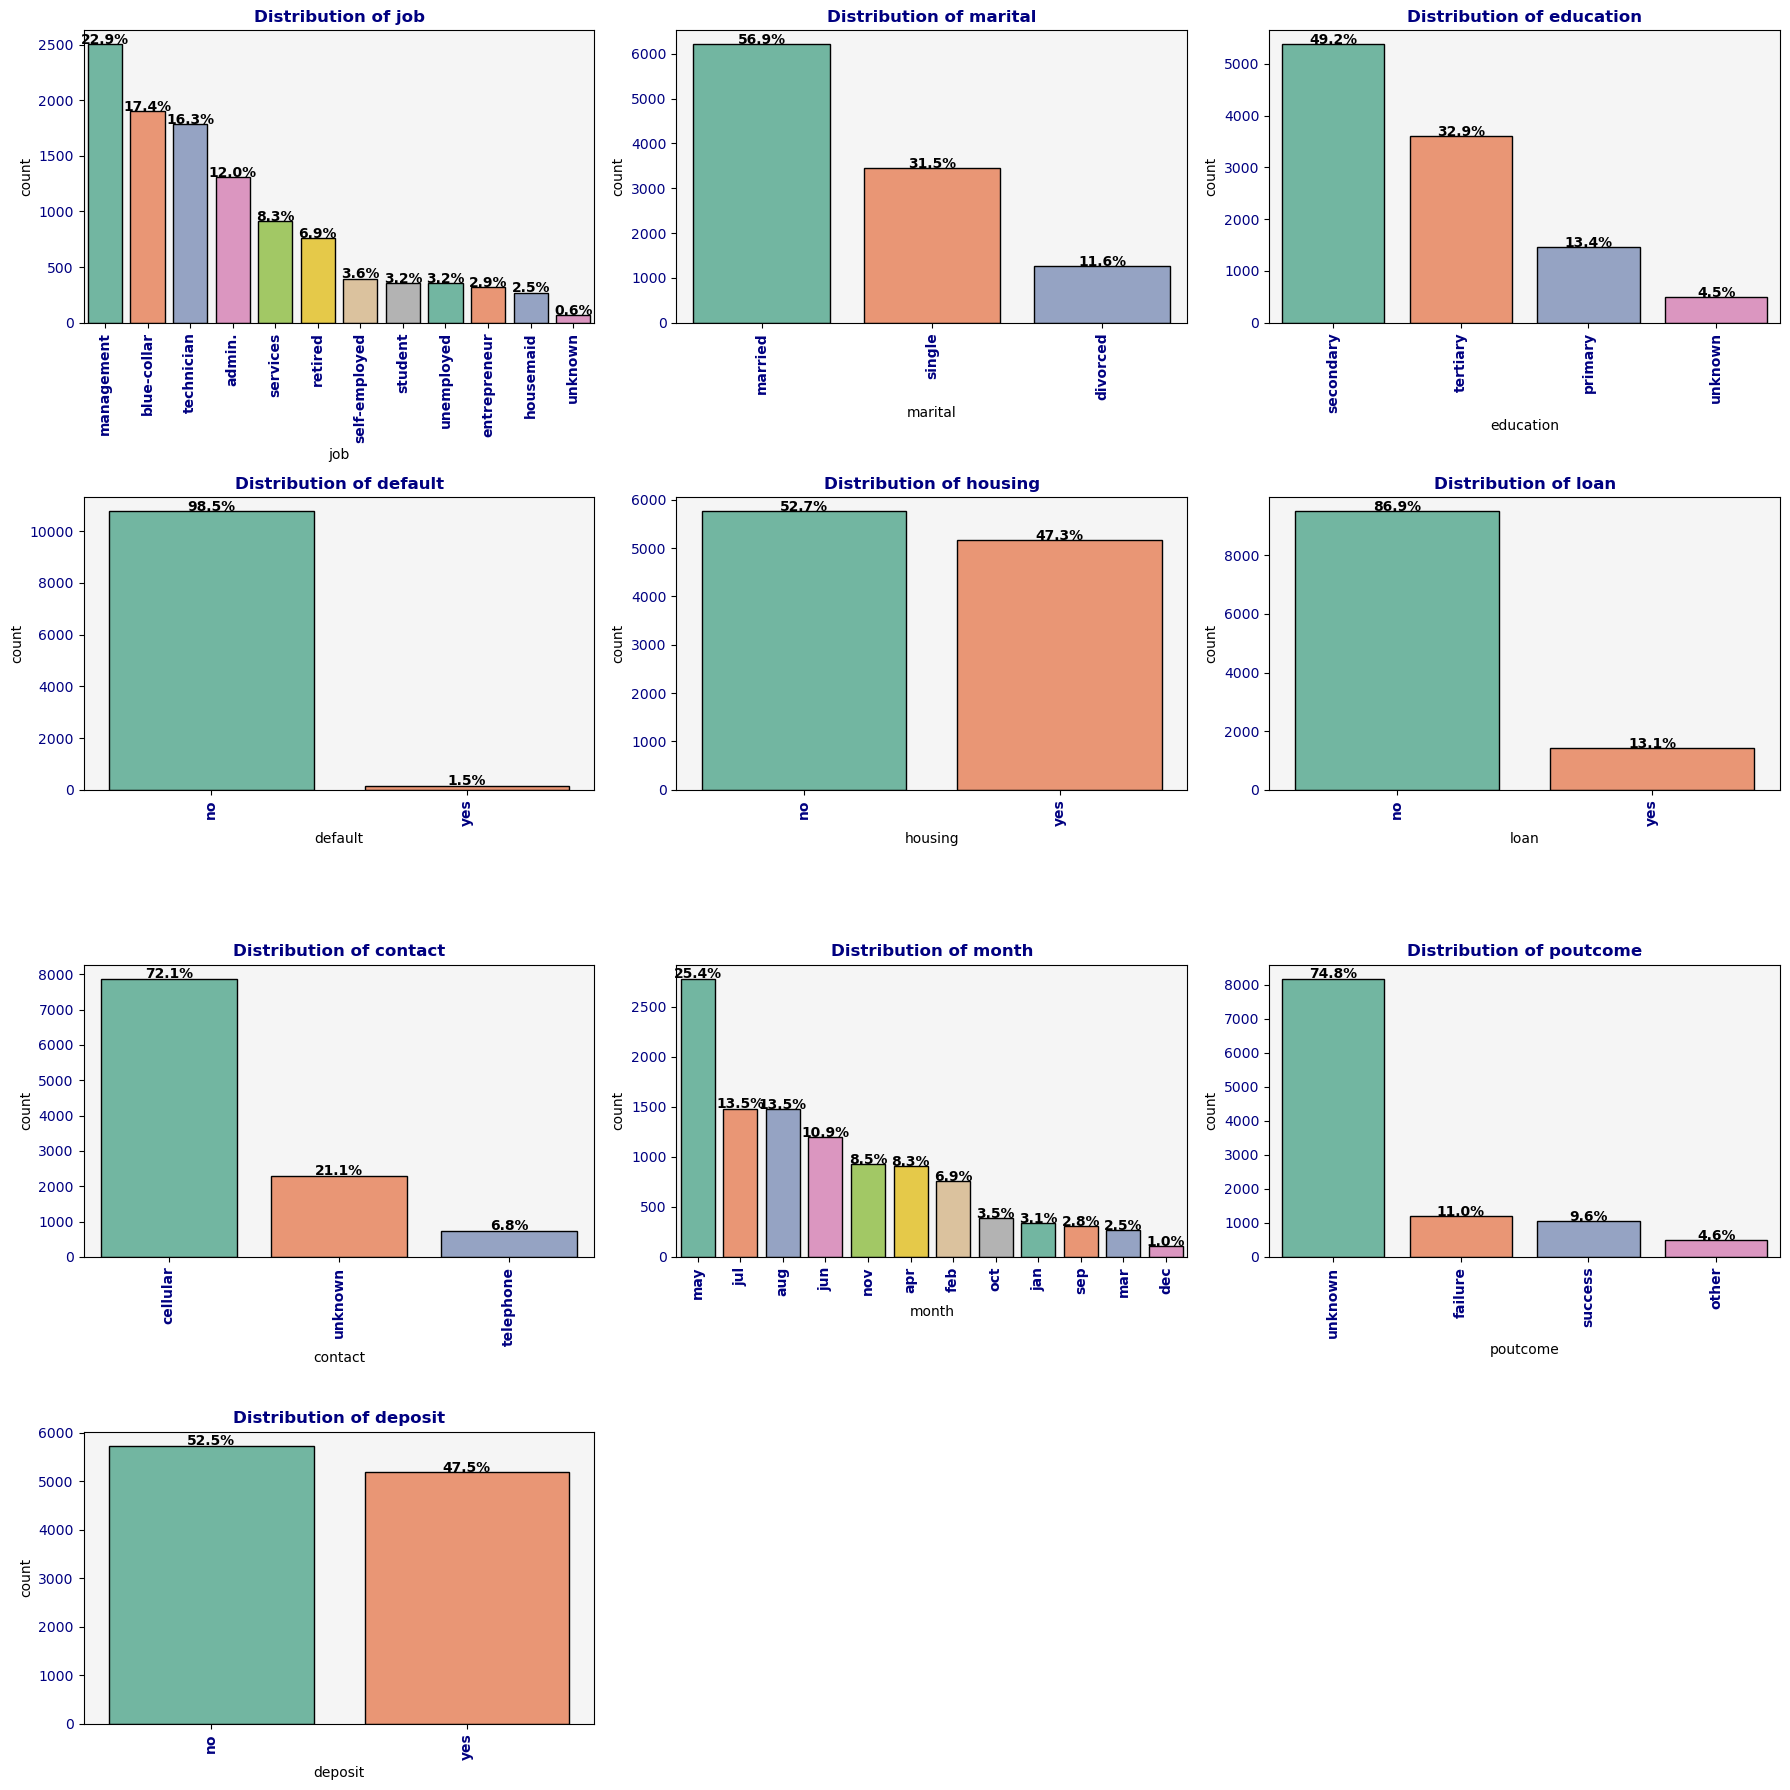

In [34]:
plt.figure(figsize=(18, 18)) 
color_palette = sns.color_palette("Set2")

for i, column in enumerate(cat_cols, 1):
    ax = plt.subplot(4, 3, i)  
    sns.countplot(x=column, data=df, palette=color_palette, order=df[column].value_counts().index, edgecolor='black')
    plt.title(f"Distribution of {column}", fontsize=12, color='navy',fontweight='bold')
    plt.xticks(rotation=90, fontsize=10, color='navy',fontweight='bold') 
    plt.yticks(fontsize=10, color='navy')

    total = float(len(df[column]))
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha='center', fontsize=10, fontweight='bold',color='black')


    ax.set_facecolor('whitesmoke')

plt.tight_layout()
plt.show()

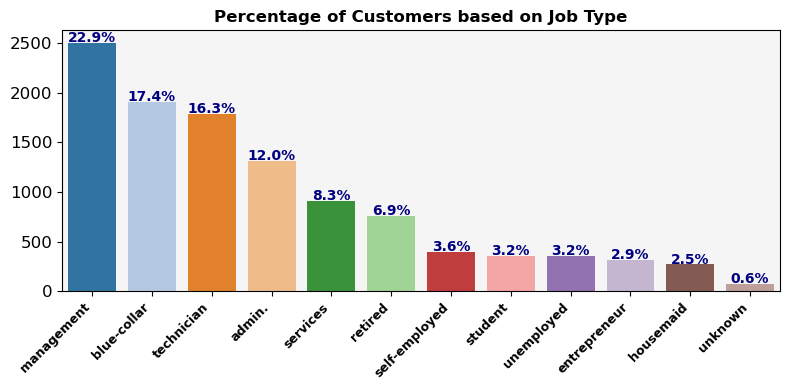

In [35]:
job_counts = df['job'].value_counts()
color_palette = sns.color_palette("tab20")

plt.figure(figsize=(8, 4))
bars = sns.barplot(x=job_counts.index, y=job_counts.values, palette=color_palette)
plt.title('Percentage of Customers based on Job Type', fontsize=12, color='black', fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=9, color='black', fontweight='bold')
plt.yticks(fontsize=12, color='black')
plt.grid(axis='y', alpha=0, color='white')
plt.gca().set_facecolor('whitesmoke')

total = len(df['job'])
for bar, count in zip(bars.patches, job_counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 10, f'{count/total*100:.1f}%',
             ha='center', fontsize=10, color='navy', fontweight='bold')

plt.tight_layout()
plt.show()

In [36]:
df['job'].value_counts()

management       2505
blue-collar      1903
technician       1784
admin.           1310
services          910
retired           759
self-employed     395
student           354
unemployed        353
entrepreneur      319
housemaid         269
unknown            68
Name: job, dtype: int64

In [37]:
df = df[df['job'] != 'unknown']

In [38]:
df['job'].value_counts()

management       2505
blue-collar      1903
technician       1784
admin.           1310
services          910
retired           759
self-employed     395
student           354
unemployed        353
entrepreneur      319
housemaid         269
Name: job, dtype: int64

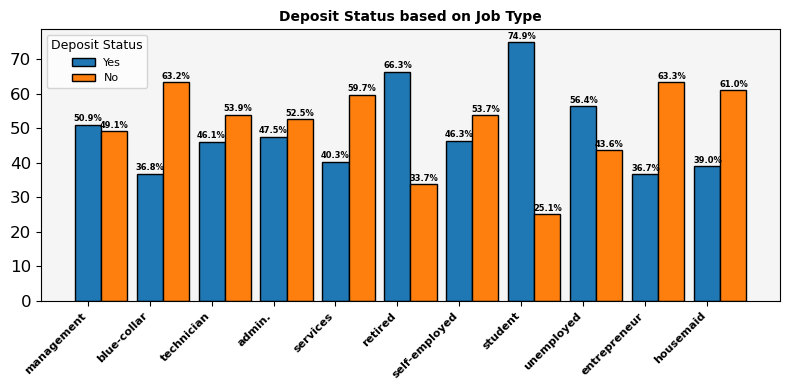

In [39]:
job_counts = df['job'].value_counts()

def yes_no_percentage(column):
    return column.value_counts(normalize=True) * 100

deposit_percentage = df.groupby('job')['deposit'].apply(yes_no_percentage).unstack().fillna(0)
deposit_percentage = deposit_percentage.reindex(job_counts.index)

plt.figure(figsize=(8, 4))
bar_width = 0.42
index = range(len(job_counts))
plt.bar(index, deposit_percentage['yes'], bar_width, label='Yes', color='#1f77b4',edgecolor='black')
plt.bar([i + bar_width for i in index], deposit_percentage['no'], bar_width, label='No', color='#ff7f0e',edgecolor='black')

plt.title('Deposit Status based on Job Type', fontsize=10, fontweight='bold')
plt.xticks(index, job_counts.index, rotation=45, ha='right', fontsize=8, fontweight='bold',color='black')
plt.yticks(fontsize=12)
plt.legend(title='Deposit Status', fontsize=8, title_fontsize='9')

for i in index:
    plt.text(i, deposit_percentage['yes'][i] + 1, f"{deposit_percentage['yes'][i]:.1f}%", ha='center', fontsize=6, fontweight='bold')
    plt.text(i + bar_width, deposit_percentage['no'][i] + 1, f"{deposit_percentage['no'][i]:.1f}%", ha='center', fontsize=6,fontweight='bold')

plt.gca().set_facecolor('whitesmoke')
plt.tight_layout()
plt.show()

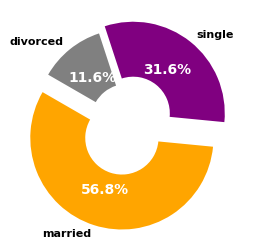

In [40]:
marital_counts = df['marital'].value_counts()
plt.figure(figsize=(3, 3))
explode = (0.2, 0.1, 0.0)  

patches, texts, autotexts = plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', startangle=150, colors=['orange', 'purple', 'gray'], wedgeprops=dict(width=0.6), explode=explode)

# plt.title('Marital Status Distribution', fontsize=10,fontweight='bold',pad=30)

for text in texts:
    text.set_fontsize(8)
    text.set_fontweight('bold')
    
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)
    autotext.set_fontweight('bold')

plt.axis('equal') 
plt.show()

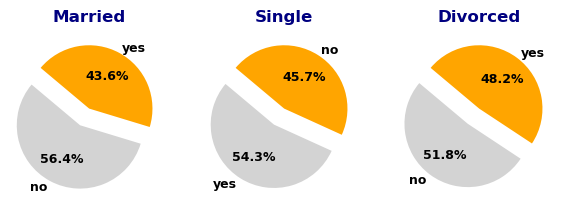

In [41]:
married_counts = df[df['marital'] == 'married']['deposit'].value_counts()
single_counts = df[df['marital'] == 'single']['deposit'].value_counts()
divorced_counts = df[df['marital'] == 'divorced']['deposit'].value_counts()

plt.figure(figsize=(6, 2))
explode = (0.3, 0)  

plt.subplot(1, 3, 1)
plt.pie(married_counts, labels=married_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightgray', 'orange'], explode=explode,textprops={'color': 'black', 'fontweight': 'bold', 'fontsize': 9})
plt.title('Married', fontsize=12, fontweight='bold', color='navy')

plt.subplot(1, 3, 2)
plt.pie(single_counts, labels=single_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightgray', 'orange'], explode=explode,textprops={'color': 'black', 'fontweight': 'bold', 'fontsize': 9})
plt.title('Single', fontsize=12, fontweight='bold',color='navy')

plt.subplot(1, 3, 3)
plt.pie(divorced_counts, labels=divorced_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightgray', 'orange'], explode=explode,textprops={'color': 'black','fontweight': 'bold', 'fontsize': 9})
plt.title('Divorced', fontsize=12, fontweight='bold',color='navy')

plt.tight_layout()
plt.show()

In [42]:
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'deposit']

In [43]:
df['education'].value_counts()

secondary    5363
tertiary     3590
primary      1458
unknown       450
Name: education, dtype: int64

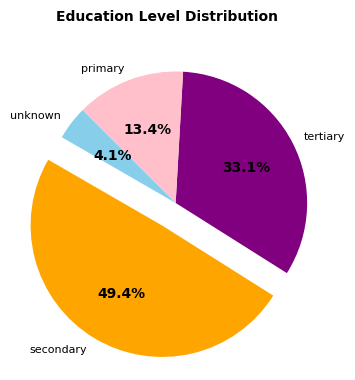

In [44]:
education_counts = df['education'].value_counts()
plt.figure(figsize=(4, 4))
explode = (0.2, 0.0, 0.0, 0.0)  

patches, texts, autotexts = plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=150, colors=['orange', 'purple', 'pink','skyblue'], wedgeprops=dict(width=1.0), explode=explode)

plt.title('Education Level Distribution', fontsize=10, fontweight='bold', pad=30)

for text in texts:
    text.set_fontsize(8)
   
    
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(10)
    autotext.set_fontweight('bold')

plt.axis('equal') 
plt.show()

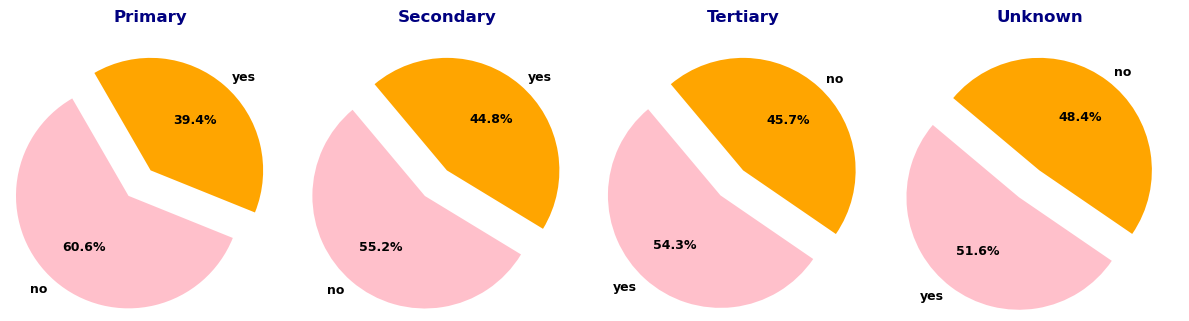

In [45]:
primary_counts = df[df['education'] == 'primary']['deposit'].value_counts()
secondary_counts = df[df['education'] == 'secondary']['deposit'].value_counts()
tertiary_counts = df[df['education'] == 'tertiary']['deposit'].value_counts()
unknown_counts = df[df['education'] == 'unknown']['deposit'].value_counts()

plt.figure(figsize=(12, 4))
explode = (0.3, 0)  

plt.subplot(1, 4, 1)
plt.pie(primary_counts, labels=primary_counts.index, autopct='%1.1f%%', startangle=120, colors=['pink', 'orange'], explode=explode, textprops={'color': 'black', 'fontweight': 'bold', 'fontsize': 9})
plt.title('Primary', fontsize=12, fontweight='bold', color='navy')

plt.subplot(1, 4, 2)
plt.pie(secondary_counts, labels=secondary_counts.index, autopct='%1.1f%%', startangle=130, colors=['pink', 'orange'], explode=explode, textprops={'color': 'black', 'fontweight': 'bold', 'fontsize': 9})
plt.title('Secondary', fontsize=12, fontweight='bold',color='navy')

plt.subplot(1, 4, 3)
plt.pie(tertiary_counts, labels=tertiary_counts.index, autopct='%1.1f%%', startangle=130, colors=['pink', 'orange'], explode=explode, textprops={'color': 'black','fontweight': 'bold', 'fontsize': 9})
plt.title('Tertiary', fontsize=12, fontweight='bold',color='navy')

plt.subplot(1, 4, 4)
plt.pie(unknown_counts, labels=unknown_counts.index, autopct='%1.1f%%', startangle=140, colors=['pink', 'orange'], explode=explode, textprops={'color': 'black','fontweight': 'bold', 'fontsize': 9})
plt.title('Unknown', fontsize=12, fontweight='bold',color='navy')

plt.tight_layout()
plt.show()

In [46]:
df = df[df['education'] != 'unknown']

In [47]:
df['education'].value_counts()

secondary    5363
tertiary     3590
primary      1458
Name: education, dtype: int64

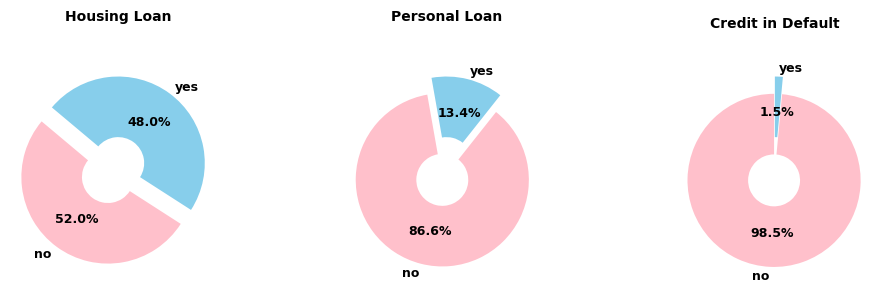

In [48]:
housing_counts = df['housing'].value_counts()
loan_counts = df['loan'].value_counts()
default_counts = df['default'].value_counts()

plt.figure(figsize=(10, 3))
explode = (0.2, 0)

plt.subplot(1, 3, 1)
plt.pie(housing_counts, labels=housing_counts.index, autopct='%1.1f%%', startangle=140, colors=['pink', 'skyblue'], explode=explode, wedgeprops=dict(width=0.7), textprops={'color': 'black', 'fontweight': 'bold', 'fontsize': 9})
plt.title('Housing Loan', fontsize=10, fontweight='bold', color='black',pad=25)

plt.subplot(1, 3, 2)
plt.pie(loan_counts, labels=loan_counts.index, autopct='%1.1f%%', startangle=100, colors=['pink', 'skyblue'], explode=explode, wedgeprops=dict(width=0.7), textprops={'color': 'black', 'fontweight': 'bold', 'fontsize': 9})
plt.title('Personal Loan', fontsize=10, fontweight='bold', color='black',pad=25)

plt.subplot(1, 3, 3)
plt.pie(default_counts, labels=default_counts.index, autopct='%1.1f%%', startangle=90, colors=['pink', 'skyblue'], explode=explode, wedgeprops=dict(width=0.7),  textprops={'color': 'black', 'fontweight': 'bold', 'fontsize': 9})
plt.title('Credit in Default', fontsize=10, fontweight='bold', color='black',pad=20)

plt.tight_layout()
plt.show()

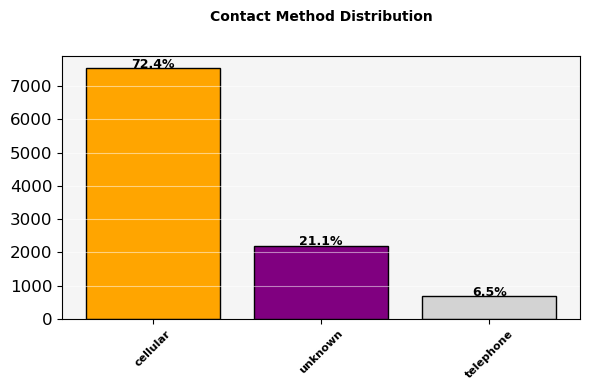

In [49]:
contact_counts = df['contact'].value_counts()

plt.figure(figsize=(6, 4))
bars = plt.bar(contact_counts.index, contact_counts.values, color=['orange', 'purple', 'lightgray'], edgecolor='black')

total = len(df['contact'])
for bar, count in zip(bars, contact_counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 10, f'{count/total*100:.1f}%',
             ha='center', fontsize=9, fontweight='bold',color='black')

plt.title('Contact Method Distribution', fontsize=10, fontweight='bold', pad=25)
plt.xticks(fontsize=8, rotation=45, fontweight='bold')
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.5, color='white', linestyle='-')

plt.gca().set_facecolor('whitesmoke')
plt.tight_layout()
plt.show()

In [50]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


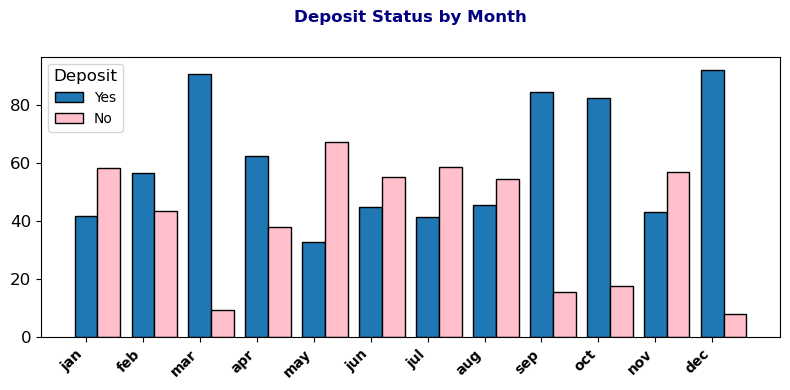

In [51]:
month_deposit_percentage = df.groupby('month')['deposit'].value_counts(normalize=True).unstack() * 100
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
month_deposit_percentage = month_deposit_percentage.reindex(months)

plt.figure(figsize=(8, 4))

bar_width = 0.40
index = range(len(month_deposit_percentage.index))
plt.bar(index, month_deposit_percentage['yes'], bar_width, label='Yes', color='#1f77b4',edgecolor='black')
plt.bar([i + bar_width for i in index], month_deposit_percentage['no'], bar_width, label='No', color='pink',edgecolor='black')

plt.title('Deposit Status by Month', fontsize=12, fontweight='bold', pad=25, color='navy')
plt.xticks(index, month_deposit_percentage.index, rotation=45, ha='right', fontsize=10, fontweight='bold',color='black')
plt.yticks(fontsize=12)
plt.legend(title='Deposit', fontsize=10, title_fontsize='12')

plt.gca().set_facecolor('white')
plt.tight_layout()
plt.show()

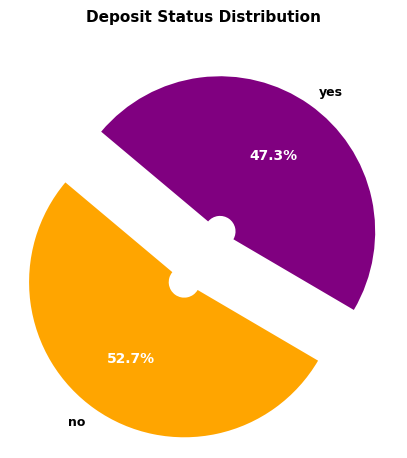

In [52]:
deposit_counts = df['deposit'].value_counts()

plt.figure(figsize=(5, 5))
explode = (0.3, 0.1)  

patches, texts, autotexts = plt.pie(deposit_counts, labels=deposit_counts.index, autopct='%1.1f%%', startangle=140, colors=['orange', 'purple'], wedgeprops=dict(width=0.9), explode=explode)

plt.title('Deposit Status Distribution', fontsize=11, fontweight='bold', pad=30, color='black')

for text in texts:
    text.set_fontsize(9)
    text.set_fontweight('bold')
    
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)
    autotext.set_fontweight('bold')

plt.gca().set_facecolor('black')
plt.axis('equal') 
plt.show()

In [53]:
# it's time to getting dummies for categorical columns

In [54]:
def one_hot_encoder(dataframe, cat_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=cat_cols, drop_first=drop_first)
    return dataframe

df = one_hot_encoder(df, cat_cols, drop_first=True)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10411 entries, 0 to 11161
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  10411 non-null  int64
 1   balance              10411 non-null  int64
 2   day                  10411 non-null  int64
 3   duration             10411 non-null  int64
 4   campaign             10411 non-null  int64
 5   pdays                10411 non-null  int64
 6   previous             10411 non-null  int64
 7   job_blue-collar      10411 non-null  uint8
 8   job_entrepreneur     10411 non-null  uint8
 9   job_housemaid        10411 non-null  uint8
 10  job_management       10411 non-null  uint8
 11  job_retired          10411 non-null  uint8
 12  job_self-employed    10411 non-null  uint8
 13  job_services         10411 non-null  uint8
 14  job_student          10411 non-null  uint8
 15  job_technician       10411 non-null  uint8
 16  job_unemployed       1

In [56]:
df.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,deposit_yes
0,59,2343,5,1042,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
1,56,45,5,1467,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
2,41,1270,5,1389,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
3,55,2476,5,579,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
4,54,184,5,673,2,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1


In [57]:
# now, we can find out if there are any corelations between the features

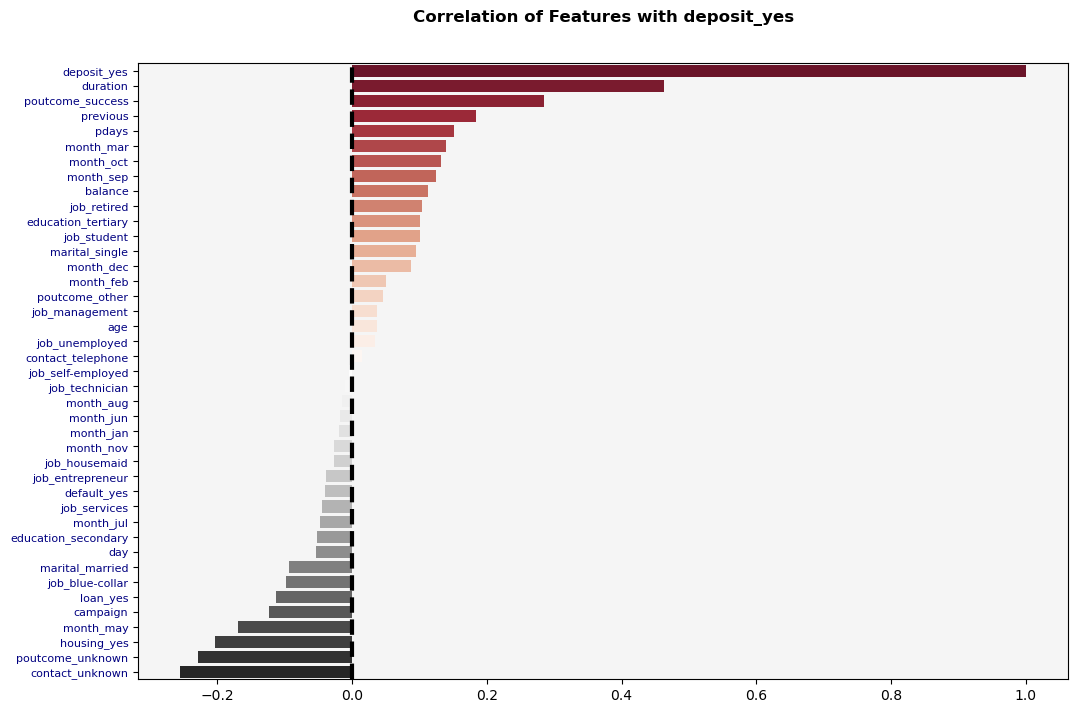

In [58]:
correlation_matrix = df.corr()
deposit_correlation = correlation_matrix['deposit_yes'].sort_values(ascending=False)

plt.figure(figsize=(12, 8))
barplot = sns.barplot(x=deposit_correlation.values, y=deposit_correlation.index, palette='RdGy')
plt.axvline(x=0, color='black', linestyle='--', linewidth=3 )
plt.title('Correlation of Features with deposit_yes', fontsize=12, fontweight='bold', pad=30, color='black' )

for text in barplot.get_yticklabels():
    text.set_fontsize(8)  
    text.set_color('navy') 

plt.gca().set_facecolor('whitesmoke')
plt.show()

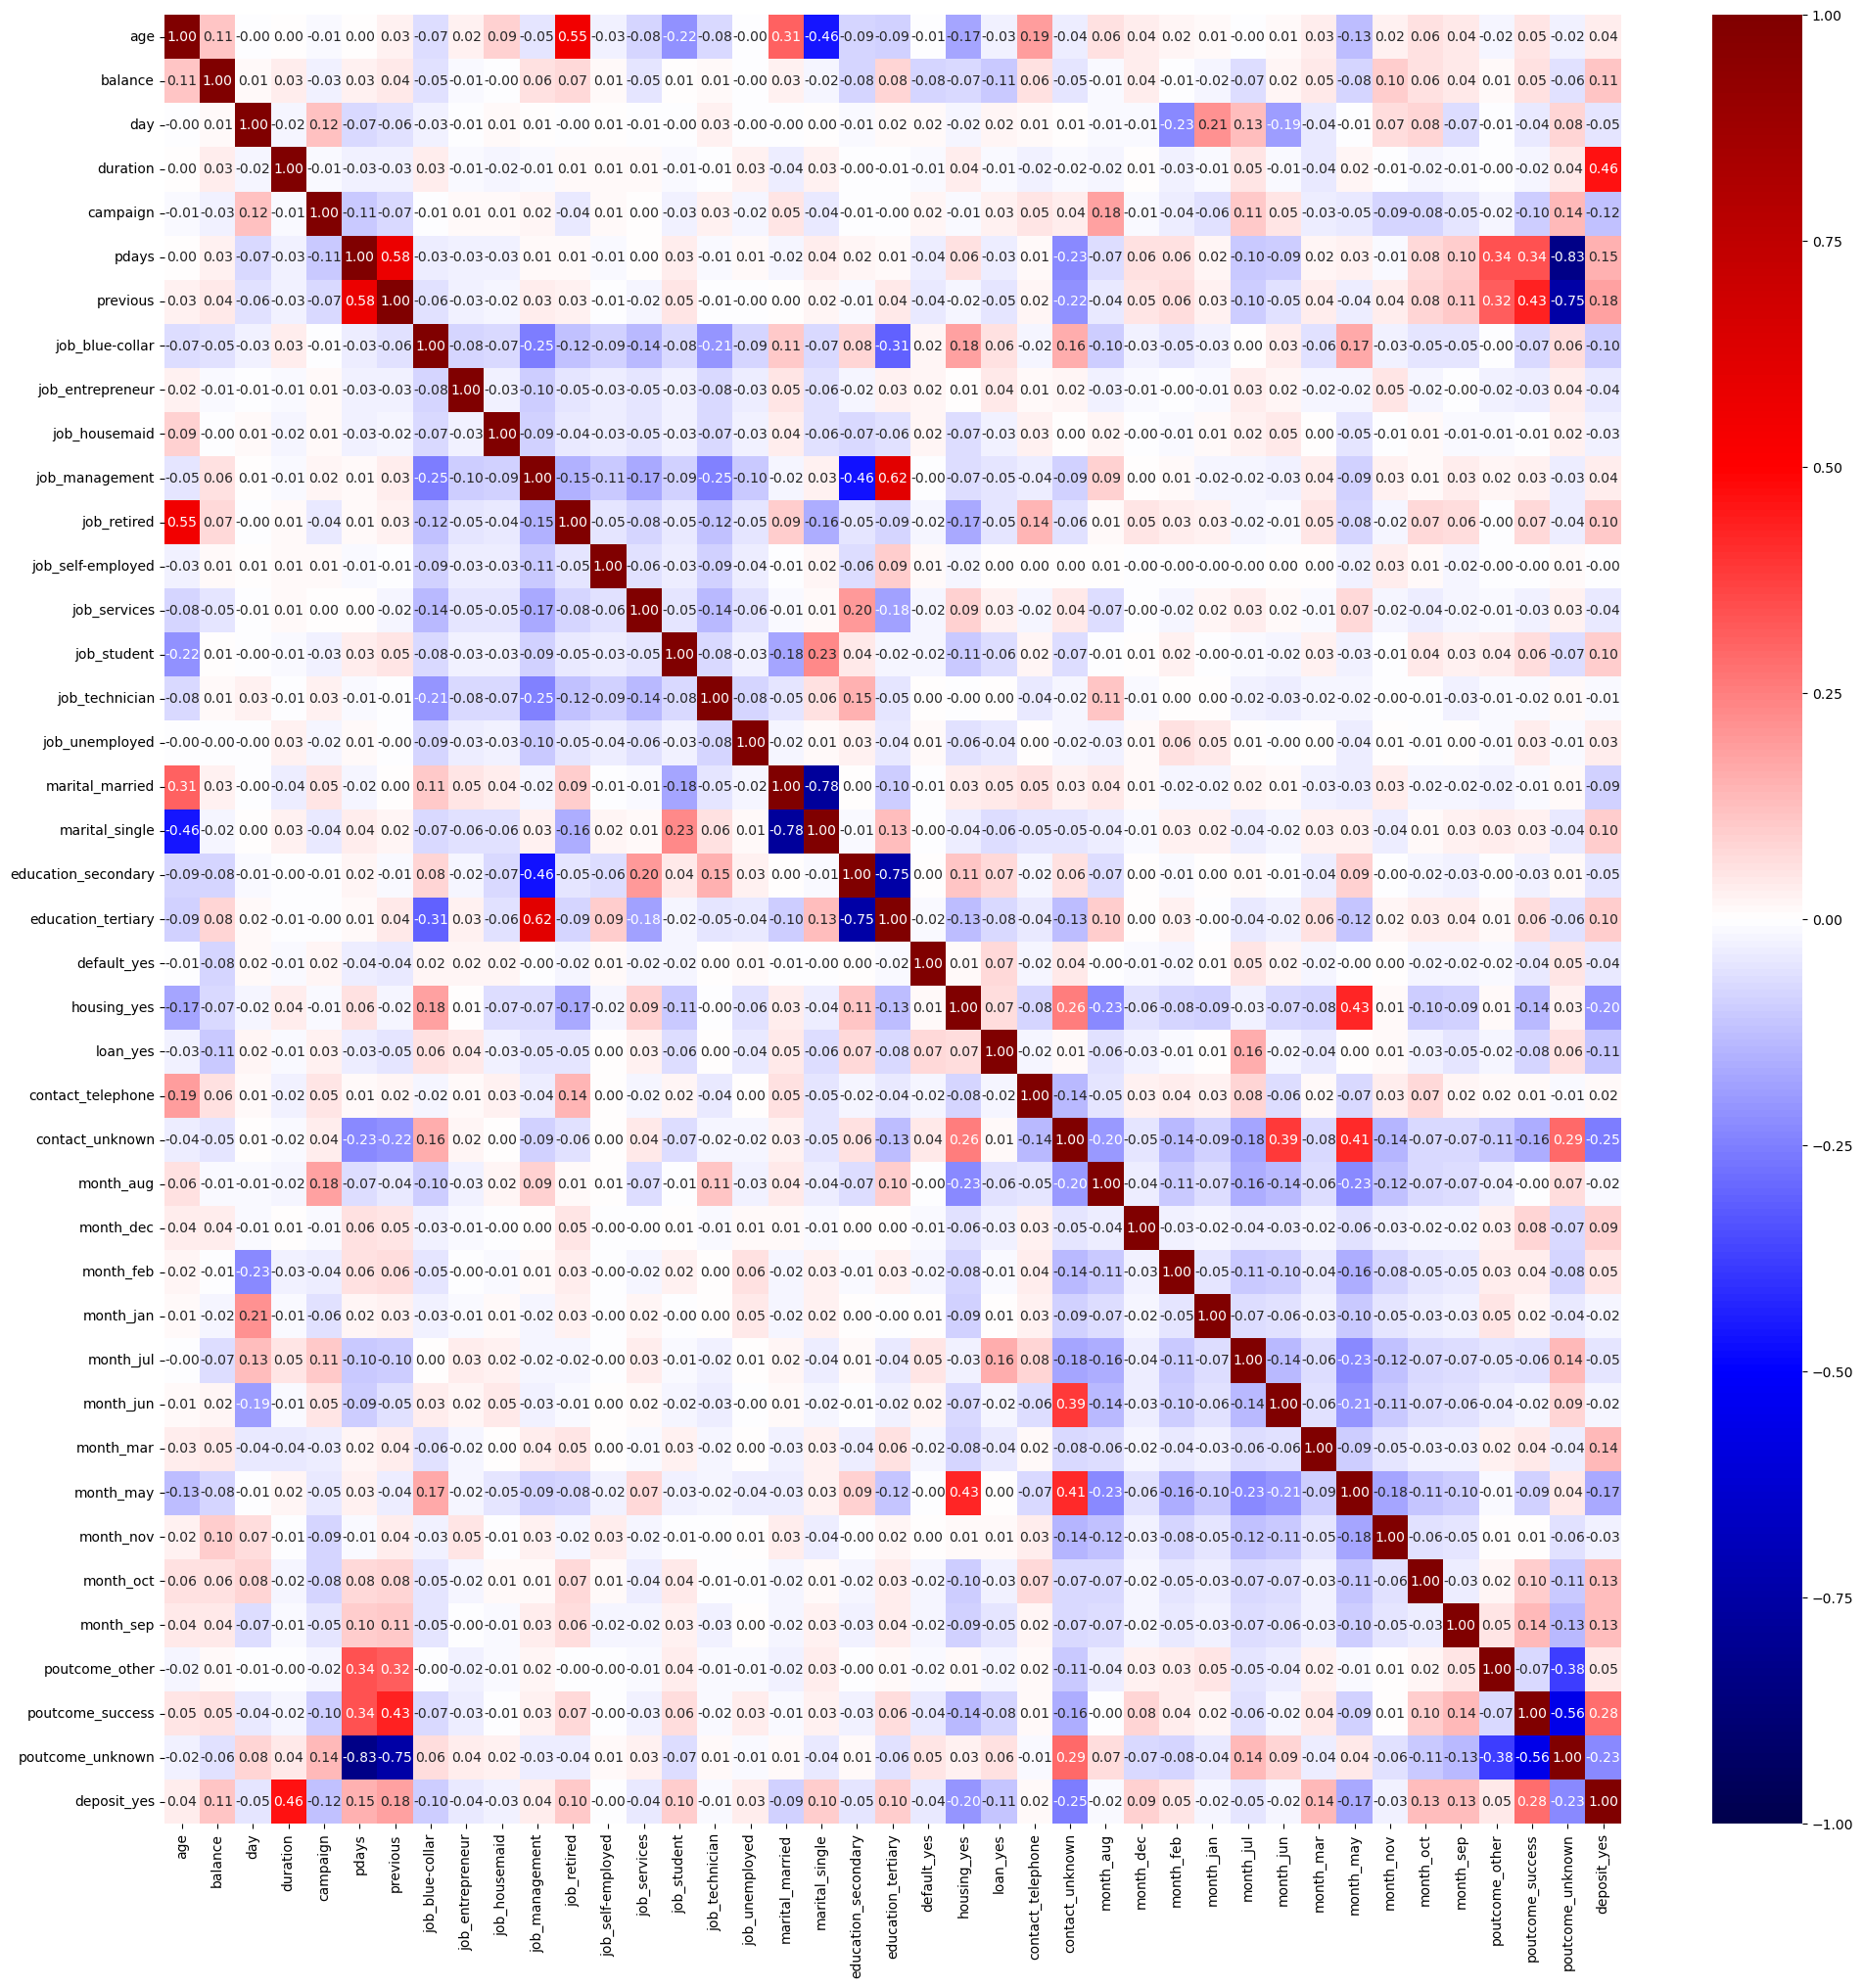

In [59]:
plt.figure(figsize=[24,24])
sns.heatmap(df.corr(), cmap="seismic", annot=True, fmt='.2f', vmin=-1, vmax=1);

In [60]:
threshold = 0.7  

correlation_matrix = df.corr().abs() 
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))  

high_correlation = upper_triangle.stack().sort_values(ascending=False)
high_correlation = high_correlation[high_correlation > threshold]

print(high_correlation)

pdays                poutcome_unknown     0.83
marital_married      marital_single       0.78
education_secondary  education_tertiary   0.75
previous             poutcome_unknown     0.75
dtype: float64


In [61]:
df.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,deposit_yes
0,59,2343,5,1042,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
1,56,45,5,1467,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
2,41,1270,5,1389,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
3,55,2476,5,579,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
4,54,184,5,673,2,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1


In [62]:
df[['age', 'balance', 'duration']].describe()

,age,balance,duration
count,10411.00,10411.00,10411.00
mean,41.00,1325.94,372.22
std,11.71,2093.13,337.73
min,18.00,-6847.00,2.00
25%,32.00,116.00,139.00
50%,38.00,535.00,256.00
75%,49.00,1642.50,501.00
max,90.00,14968.00,2621.00


In [63]:
standart_scaler = StandardScaler()
df["age"] = standart_scaler.fit_transform(df[['age']])
df["duration"] = standart_scaler.fit_transform(df[['duration']])  
df["day"] = standart_scaler.fit_transform(df[['day']]) 

scaler = MinMaxScaler()
df["balance"] = scaler.fit_transform(df[['balance']])

In [64]:
df.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,deposit_yes
0,1.54,0.42,-1.26,1.98,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
1,1.28,0.32,-1.26,3.24,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
2,-0.00,0.37,-1.26,3.01,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
3,1.19,0.43,-1.26,0.61,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
4,1.11,0.32,-1.26,0.89,2,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10411 entries, 0 to 11161
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  10411 non-null  float64
 1   balance              10411 non-null  float64
 2   day                  10411 non-null  float64
 3   duration             10411 non-null  float64
 4   campaign             10411 non-null  int64  
 5   pdays                10411 non-null  int64  
 6   previous             10411 non-null  int64  
 7   job_blue-collar      10411 non-null  uint8  
 8   job_entrepreneur     10411 non-null  uint8  
 9   job_housemaid        10411 non-null  uint8  
 10  job_management       10411 non-null  uint8  
 11  job_retired          10411 non-null  uint8  
 12  job_self-employed    10411 non-null  uint8  
 13  job_services         10411 non-null  uint8  
 14  job_student          10411 non-null  uint8  
 15  job_technician       10411 non-null 

In [66]:
# Let's split the data into features and target 

X = df.drop('deposit_yes', axis=1)
y = df['deposit_yes']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [68]:
rf = RandomForestClassifier()

acc_rf = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
acc_rf

array([0.85596708, 0.82304527, 0.85792725, 0.85518188, 0.84694578])

In [69]:
dt = DecisionTreeClassifier() 

acc_dt = cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy')
acc_dt

array([0.78463649, 0.7702332 , 0.78242965, 0.7865477 , 0.78586136])

In [70]:
xgboost = XGBClassifier()

acc_xgboost = cross_val_score(xgboost, X_train, y_train, cv=5, scoring='accuracy')
acc_xgboost

array([0.87722908, 0.84019204, 0.86822237, 0.85175017, 0.8490048 ])

In [71]:
logreg = LogisticRegression(solver='liblinear')

acc_logreg = cross_val_score(logreg, X_train, y_train, cv=5, scoring='accuracy')
acc_logreg

array([0.83813443, 0.80246914, 0.8325326 , 0.83596431, 0.8160604 ])

In [72]:
knn = KNeighborsClassifier()

acc_knn = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
acc_knn

array([0.79698217, 0.78257888, 0.77350721, 0.78105697, 0.77282086])

In [73]:
perceptron = Perceptron()

acc_perc = cross_val_score(perceptron, X_train, y_train, cv=5, scoring='accuracy')
acc_perc

array([0.72153635, 0.76954733, 0.78448868, 0.64104324, 0.74468085])

In [74]:
svc = SVC()

acc_svc = cross_val_score(svc, X_train, y_train, cv=5, scoring='accuracy')
acc_svc

array([0.62071331, 0.63237311, 0.64241592, 0.62319835, 0.62525738])

In [75]:
acc_perc = cross_val_score(perceptron, X_train, y_train, cv=5, scoring='accuracy')

results = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree', 'XGBoost',
              'Logistic Regression', 'KNN', 'Perceptron', 'SVC'],
    'Cross Validated Score (Mean)': [acc_rf.mean(), acc_dt.mean(), acc_xgboost.mean(), acc_logreg.mean(),
                                     acc_knn.mean(), acc_perc.mean(), acc_svc.mean()],
    'Cross Validated Score (Std)': [acc_rf.std(), acc_dt.std(), acc_xgboost.std(), acc_logreg.std(),
                                    acc_knn.std(), acc_perc.std(), acc_svc.std()]})

result_df = results.sort_values(by='Cross Validated Score (Mean)', ascending=False)
result_df = result_df.set_index('Model')
result_df['Cross Validated Score (Mean)'] = (result_df['Cross Validated Score (Mean)']*100).round(2)
result_df['Cross Validated Score (Std)'] = (result_df['Cross Validated Score (Std)']*100).round(2)
result_df

,Cross Validated Score (Mean),Cross Validated Score (Std)
Model,,
XGBoost,85.73,1.35
Random Forest,84.78,1.29
Logistic Regression,82.50,1.37
Decision Tree,78.19,0.60
KNN,78.14,0.87
Perceptron,73.23,5.04
SVC,62.88,0.78


In [76]:
model = XGBClassifier()
model.fit(X_train, y_train)
predicts = model.predict(X_test)

Specificity: 0.84610630407911


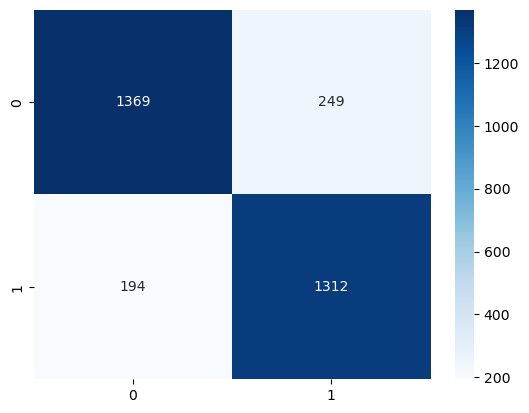

In [77]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True, fmt='g',cmap=plt.cm.Blues);

print("Specificity:",specificity)

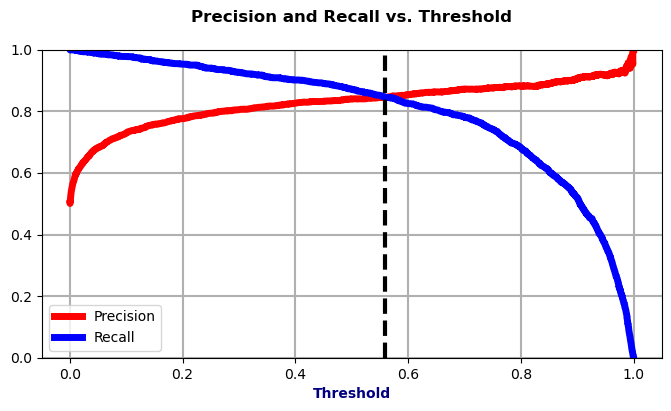

In [78]:
xgboost_model = XGBClassifier()
xgboost_model.fit(X_train, y_train)

y_scores = xgboost_model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

def plot_precision_recall_vs_threshold(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="Precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="Recall", linewidth=5)
    plt.xlabel("Threshold", fontsize=10, fontweight='bold', color='navy')
    plt.legend(loc="lower left", fontsize=10)
    plt.ylim([0, 1])

    # Draw a line from the intersection point downwards
    intersect_threshold = thresholds[np.argmin(np.abs(precision - recall))]
    plt.axvline(x=intersect_threshold, color='black', linestyle='--', linewidth=3)

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precision, recall, thresholds)
plt.title('Precision and Recall vs. Threshold', fontsize=12, pad=20, fontweight='bold')
plt.grid(True, linewidth=1.5)
plt.show()

In [79]:
from ipywidgets import interactive, FloatSlider

def plot_interactive_confusion_matrix(threshold):
    y_pred = (y_scores > threshold).astype(int)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix (Threshold={threshold:.2f})')
    plt.show()

interactive(plot_interactive_confusion_matrix, threshold=(0.0, 1.0, 0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

In [80]:
fpr, tpr, _ = roc_curve(y_test, predicts)
roc_auc = auc(fpr, tpr)

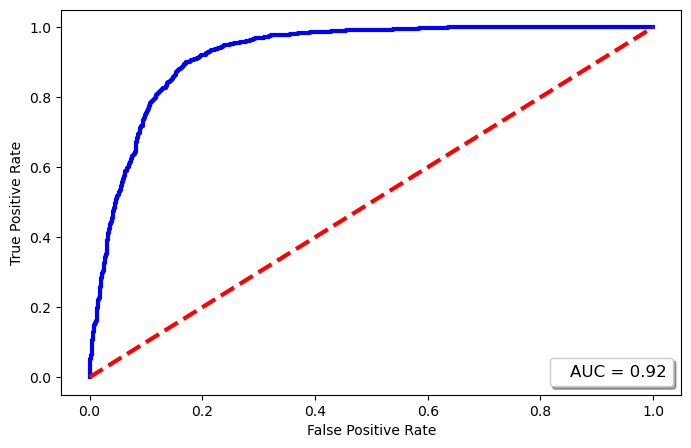

In [81]:
plt.figure(figsize = (8, 5))

probs = model.predict_proba(X_test)
preds = probs[:,1]
fprxgb, tprxgb, _ = roc_curve(y_test, preds)
roc_aucxgb = auc(fprxgb, tprxgb)

plt.plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb, linewidth=3)
plt.plot([0, 1], [0, 1],'r--', linewidth=3)
plt.ylabel('True Positive Rate', fontsize=10)
plt.xlabel('False Positive Rate', fontsize=10)
plt.legend(loc='lower right', fontsize=12, fancybox=True, shadow=True, frameon=True, handlelength=0)
plt.show()

In [82]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_test, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9231582118169268
